<a href="https://colab.research.google.com/github/sakshi3182005/playground-programs/blob/main/rainFallPrediction_gColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [20]:
#import dataset
data = pd.read_csv("weatherAUS.csv")

In [21]:
data[['RainToday', 'RainTomorrow']].replace({'No': 0, 'Yes': 1}, inplace=True)

/tmp/ipython-input-4265806589.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[['RainToday', 'RainTomorrow']].replace({'No': 0, 'Yes': 1}, inplace=True)
/tmp/ipython-input-4265806589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['RainToday', 'RainTomorrow']].replace({'No': 0, 'Yes': 1}, inplace=True)


In [ ]:
#data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
#data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [22]:
print(data[['RainToday','RainTomorrow']])

       RainToday RainTomorrow
0             No           No
1             No           No
2             No           No
3             No           No
4             No           No
...          ...          ...
142188        No           No
142189        No           No
142190        No           No
142191        No           No
142192        No           No

[142193 rows x 2 columns]


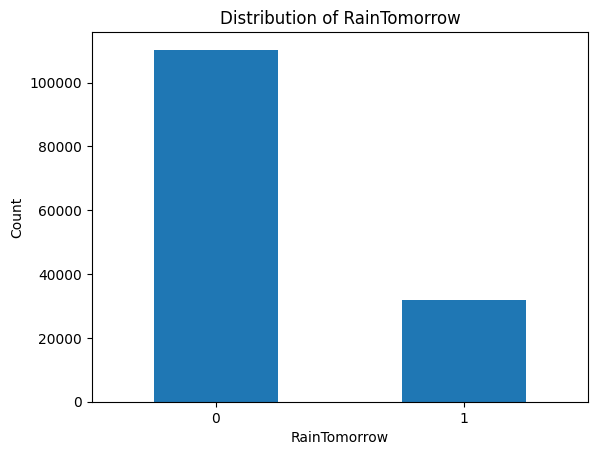

In [ ]:
data['RainTomorrow'].value_counts().plot(kind='bar')

plt.title('Distribution of RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

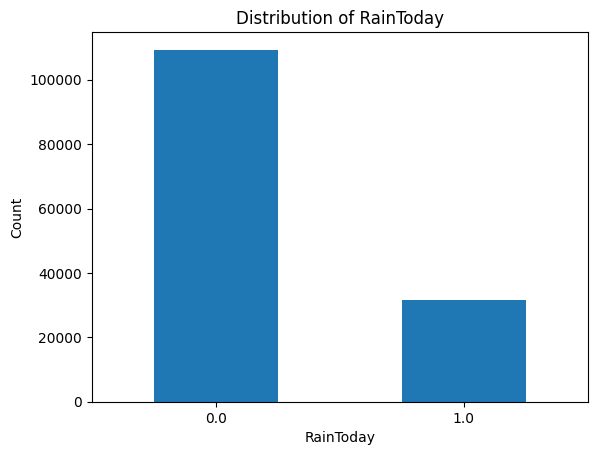

In [ ]:
data['RainToday'].value_counts().plot(kind='bar')

plt.title('Distribution of RainToday')
plt.xlabel('RainToday')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#define variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
#split data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
#Data preprocessing
#data_encoded =

In [ ]:
# store columns with specific data type
numeric_columns = data.select_dtypes(include=['int64','float64','int32']).columns
#float_columns = df.select_dtypes(include=['float64']).columns
object_columns = data.select_dtypes(include=['object']).columns

In [ ]:
# display columns
print('\nint64 columns:\n', numeric_columns)
#print('\nfloat64 columns:\n', float_columns)
print('\nobject columns:\n', object_columns)


int64 columns:
 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

object columns:
 Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
for col in data.select_dtypes(include='object').columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
print(data.head(5))

   Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   NaN       NaN     13.4     22.9       0.6          NaN       NaN   
1   NaN       NaN      7.4     25.1       0.0          NaN       NaN   
2   NaN       NaN     12.9     25.7       0.0          NaN       NaN   
3   NaN       NaN      9.2     28.0       0.0          NaN       NaN   
4   NaN       NaN     17.5     32.3       1.0          NaN       NaN   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Pressure9am  Pressure3pm  \
0          NaN           44.0         NaN  ...       1007.7       1007.1   
1          NaN           44.0         NaN  ...       1010.6       1007.8   
2          NaN           46.0         NaN  ...       1007.6       1008.7   
3          NaN           24.0         NaN  ...       1017.6       1012.8   
4          NaN           41.0         NaN  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow_No  \
0       8.0       NaN     16.9

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow_No,RainTomorrow_Yes


In [ ]:
data = pd.get_dummies(data, columns=['RainTomorrow'])

In [ ]:
print(data['RainTomorrow_Yes'])

0        False
1        False
2        False
3        False
4        False
         ...  
63530    False
63531    False
63532    False
63533     True
63534    False
Name: RainTomorrow_Yes, Length: 63535, dtype: bool


In [ ]:
data.isnull().sum()

,0
Date,0
Location,0
MinTemp,427
MaxTemp,211
Rainfall,754
Evaporation,35982
Sunshine,42507
WindGustDir,5451
WindGustSpeed,5444
WindDir9am,6333


In [ ]:
#Data preprocessing
data_cleaned = data.dropna(axis=1)

In [ ]:
print(data.shape)
print(data_cleaned.head(5))

(63535, 24)
         Date Location
0  2008-12-01   Albury
1  2008-12-02   Albury
2  2008-12-03   Albury
3  2008-12-04   Albury
4  2008-12-05   Albury
